# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### For car dealers, we provide overall understanding of what makes car value change. This is very important to handle the car stock and to sell cars communicating with customers. In this report we will share the analaysis results in terms of coefficiency of each attribute as much as possible.








### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

##### 1. Overall data: Check how many data and columns are in the data set to see if we can handle them all in a reasonable process time
##### 2. Column data type: Check numerical or categorical. As needed change the data type to the appropriate ones
##### 3. Data contents: Check null data existence and decide either to remove them or fill them out with alternate data
##### 4. Column price dependency: Identify no price dependency columns and eliminate them
##### 5. Column selection: Check how many columns are in the data set and what columns we should keep or drop
##### 6. Data review: Check price distribution and counts by each column
##### 7. Data integrity: Remove unreasonable outliners so the data analysis result will not be distorted

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.feature_selection import SequentialFeatureSelector
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
pd.set_option('display.max_rows', 100)
set_config(display="diagram") #setting this will display your pipelines as seen above

Check overall data. 426K data in the data set. This could be a little bit large number to handle with a limited PC processing speed.

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Eliminate obvious non price dependant columns.

In [3]:
df = df.drop(["id", "VIN"], axis = 1)

Some of the columns such as size have so many missing data.

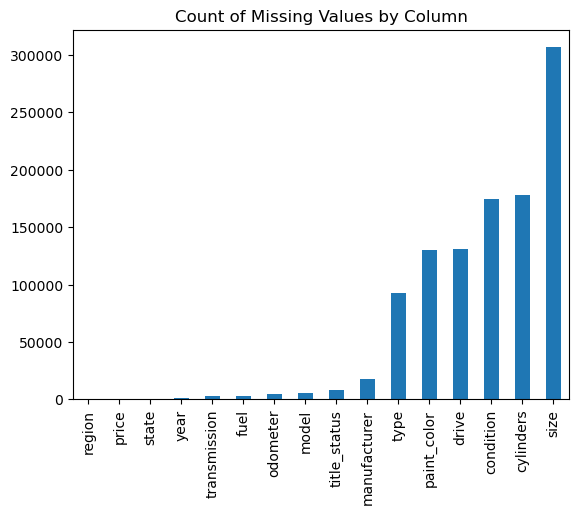

In [4]:
df.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Count of Missing Values by Column')
plt.show()

If we eliminate all the data with null, only 79K data remains.

In [5]:
dfnona = df.dropna()
dfnona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79195 entries, 31 to 426836
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        79195 non-null  object 
 1   price         79195 non-null  int64  
 2   year          79195 non-null  float64
 3   manufacturer  79195 non-null  object 
 4   model         79195 non-null  object 
 5   condition     79195 non-null  object 
 6   cylinders     79195 non-null  object 
 7   fuel          79195 non-null  object 
 8   odometer      79195 non-null  float64
 9   title_status  79195 non-null  object 
 10  transmission  79195 non-null  object 
 11  drive         79195 non-null  object 
 12  size          79195 non-null  object 
 13  type          79195 non-null  object 
 14  paint_color   79195 non-null  object 
 15  state         79195 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 10.3+ MB


Keep null data by filling out with missing.

In [6]:
alllist = ["region", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
df = df.dropna(subset = ['year','odometer'])
for i in alllist:
    df[i] = df[i].fillna("missing")
df.shape

(421344, 16)

In [7]:
df['odometer'] = df['odometer'].astype(int)
df['year'] = df['year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421344 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        421344 non-null  object
 1   price         421344 non-null  int64 
 2   year          421344 non-null  int32 
 3   manufacturer  421344 non-null  object
 4   model         421344 non-null  object
 5   condition     421344 non-null  object
 6   cylinders     421344 non-null  object
 7   fuel          421344 non-null  object
 8   odometer      421344 non-null  int32 
 9   title_status  421344 non-null  object
 10  transmission  421344 non-null  object
 11  drive         421344 non-null  object
 12  size          421344 non-null  object
 13  type          421344 non-null  object
 14  paint_color   421344 non-null  object
 15  state         421344 non-null  object
dtypes: int32(2), int64(1), object(13)
memory usage: 51.4+ MB


Cut off potential outliers, just in case.

In [8]:
df = df[(df['odometer']>0) & (df['odometer']<300000)]
df = df[(df['price']>0) & (df['price']<100000)]
df = df[(df['year']>1990) & (df['year']<2025)]
df.shape

(373749, 16)

In [9]:
df2 = df.drop(["region", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis = 1)
df2

,price,year,odometer
27,33590,2014,57923
28,22590,2010,71229
29,39590,2020,19160
30,30990,2017,41124
31,15000,2013,128000
...,...,...,...
426875,23590,2019,32226
426876,30590,2020,12029
426877,34990,2020,4174
426878,28990,2018,30112


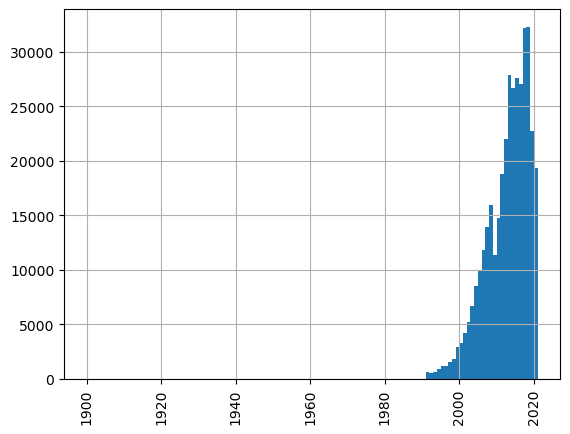

In [10]:
df2['year'].hist(bins=range(1900, max(df['year']), 1))
plt.xticks(rotation=90)
plt.show()

The histogram avebe/below shows standard distribution. So it does not seem we need to modify the data to log. Also typically year and odmeter will affect just linieary.

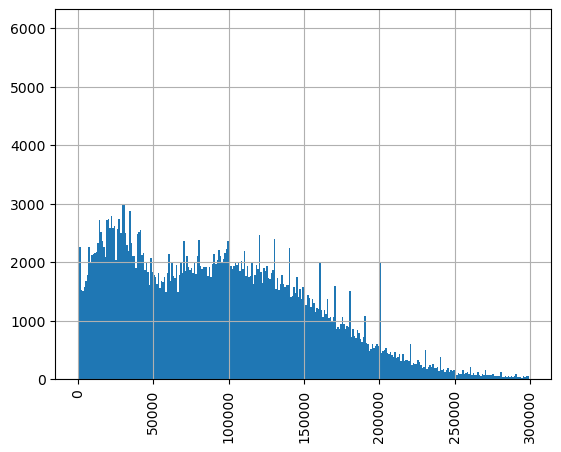

In [11]:
df2['odometer'].hist(bins=range(0, max(df['odometer']), 1000))
plt.xticks(rotation=90)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Price Modeling using only Odmeter and Year.

Cut off some potential outliers here.

In [12]:
df2 = df2[(df2['odometer']>0) & (df2['odometer']<200000)]
df2 = df2[(df2['price']>0) & (df2['price']<50000)]
df2 = df2[(df2['year']>2000) & (df2['year']<2025)]
df2.shape

(330760, 3)

In [13]:
X2 = df2.drop('price', axis = 1)
y2 = df2['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)
X2_train.info()
X2_train

<class 'pandas.core.frame.DataFrame'>
Index: 248070 entries, 37879 to 157827
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   year      248070 non-null  int32
 1   odometer  248070 non-null  int32
dtypes: int32(2)
memory usage: 3.8 MB


,year,odometer
37879,2011,107035
354462,2016,34439
224855,2011,115664
679,2009,92518
354705,2019,16524
...,...,...
155242,2013,82000
334483,2008,140000
170673,2017,31622
189120,2014,113134


In [14]:
linreg = LinearRegression().fit(X2_train, y2_train)
linreg_train_preds = linreg.predict(X2_train)
linreg_test_preds = linreg.predict(X2_test)
linreg_train_mse = mean_squared_error(y2_train, linreg_train_preds)
linreg_test_mse = mean_squared_error(y2_test, linreg_test_preds)
coefs = linreg.coef_
intercept = linreg.intercept_
slope0 = round(float(coefs[0]), 2)
intercept = round(float(intercept), 2)
slope1 = round(float(coefs[1]), 2)
print(f'Train MSE: {linreg_train_mse}')
print(f'Test MSE: {linreg_test_mse}')
#print(coefs)
print(slope0)
print(slope1)
print(intercept)

Train MSE: 91499824.23791449
Test MSE: 92903505.98947418
1072.5
-0.06
-2135814.05


It looks like the prediction is working well.s

Confirmed the above prediction and coefficients are resonable. 

In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
print(linreg.predict([[2013,110000]]))
print(linreg.predict([[2013, 10000]]))
print(linreg.predict([[2023, 10000]]))
print(linreg.predict([[2023, 0]]))

[16734.33041966]
[22553.35249804]
[33278.38628209]
[33860.28848993]


In [16]:
df2["prediction"] = linreg.predict(df2[["year", "odometer"]])
df2.head(10)

,price,year,odometer,prediction
27,33590,2014,57923,20837.205926
28,22590,2010,71229,15772.913334
29,39590,2020,19160,29527.853724
30,30990,2017,41124,25032.253580
31,15000,2013,128000,15686.906446
32,27990,2012,68696,18065.315921
33,34590,2016,29499,24636.211518
34,35000,2019,43000,27068.095483
35,29990,2016,17302,25345.957641
36,38590,2011,30237,19230.750243


Just using only Odmeter and Year, modeling looks reasonable but some higher pricing cars are not well alinged with prediction plane.
We need to add other categorical values so our prediction is more appropriate.

#### Price Modeling using all calumns as much as possible

Check each categorical column data overview: Price distribution and Counts.

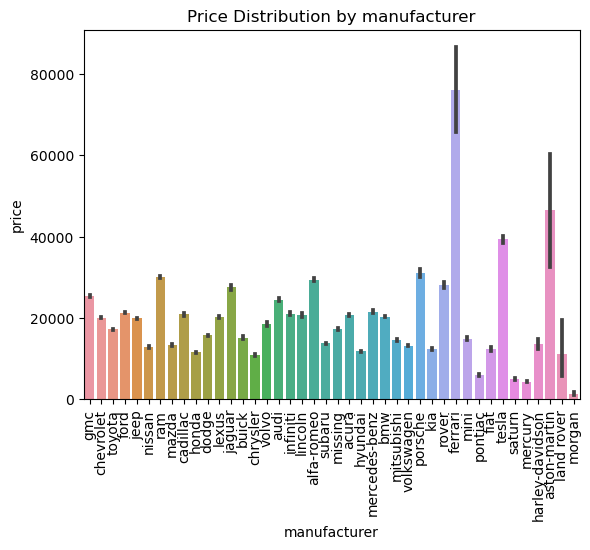

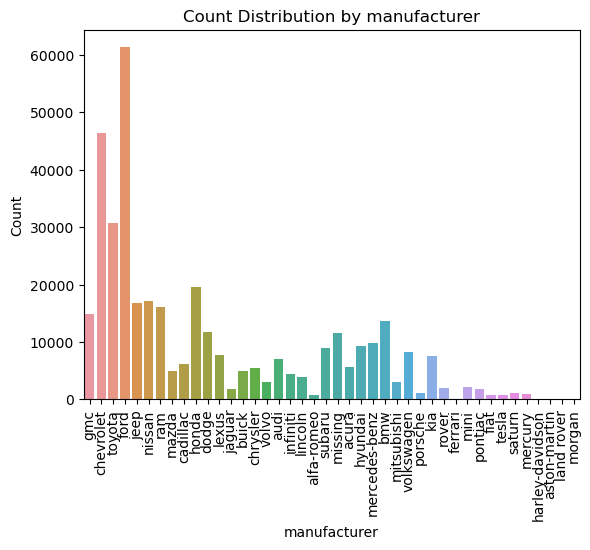

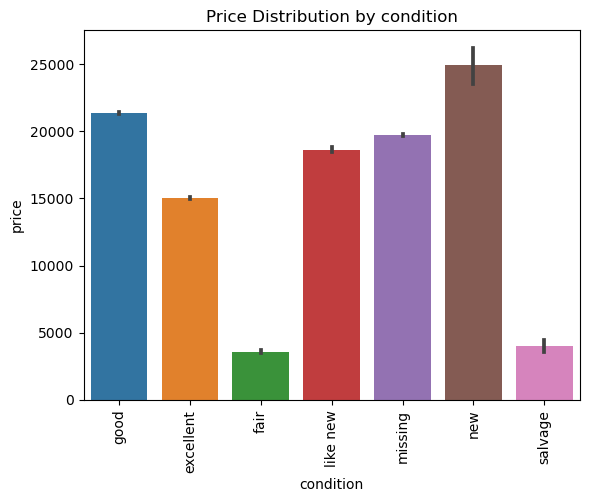

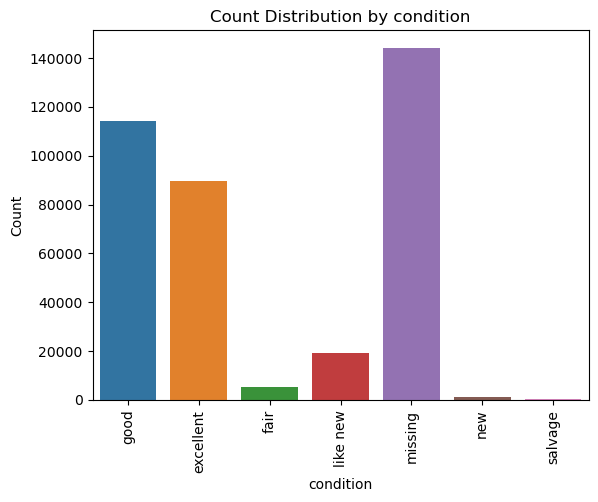

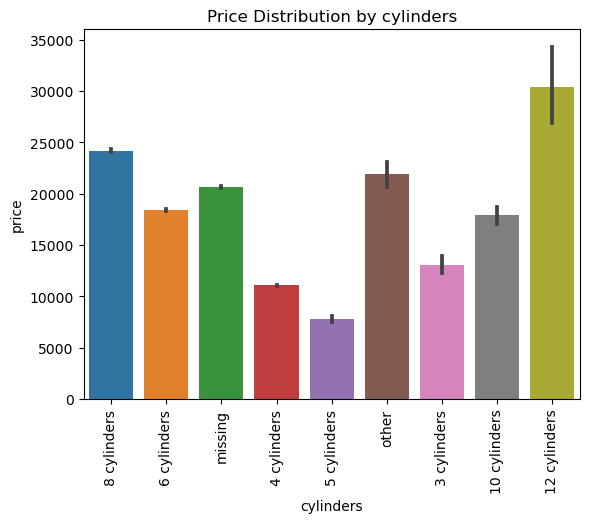

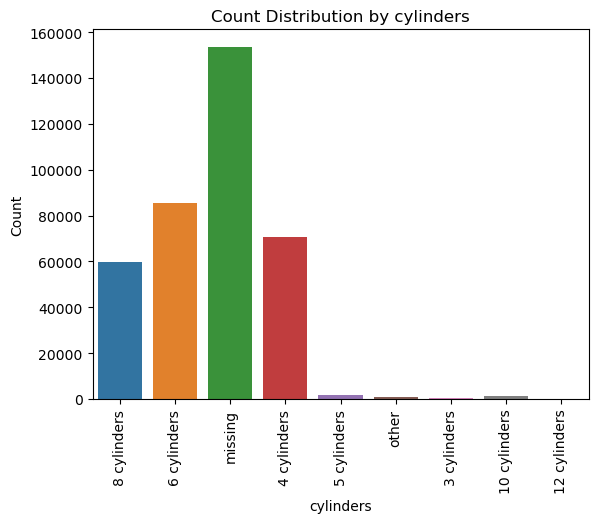

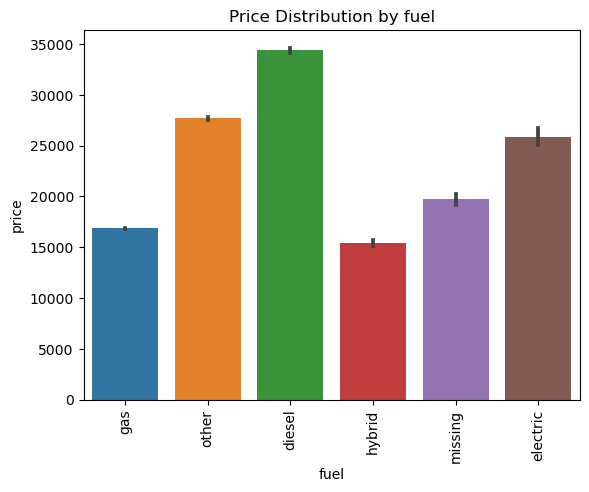

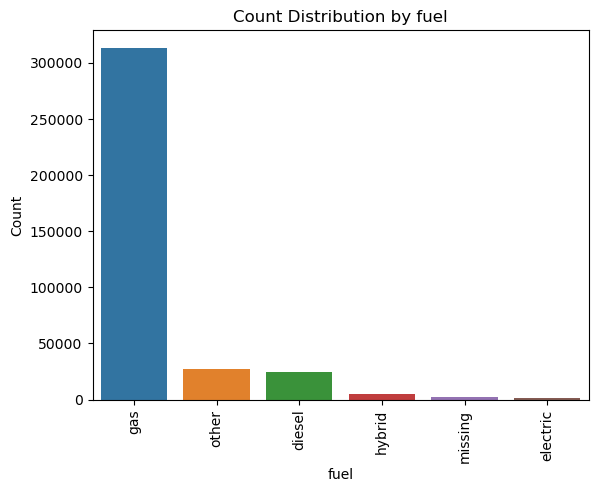

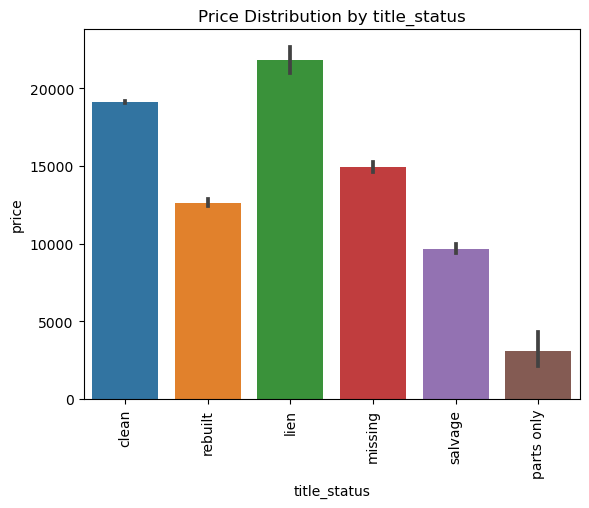

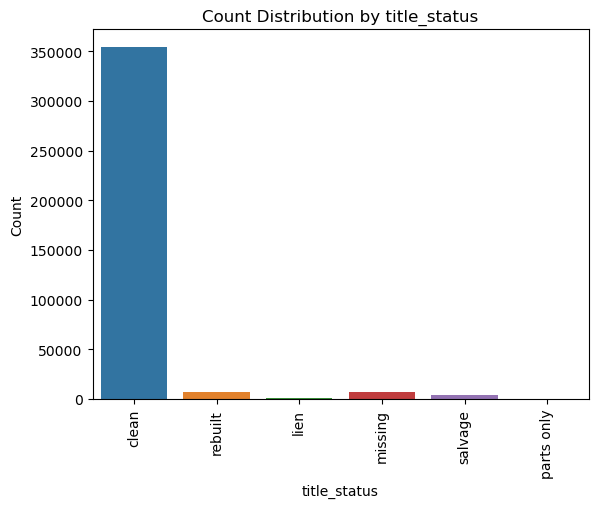

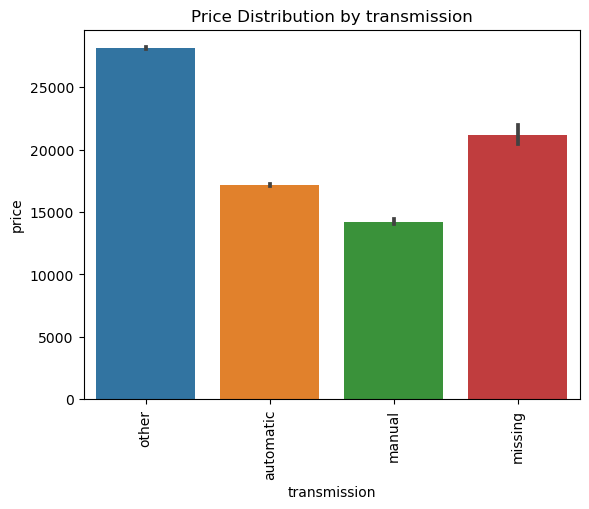

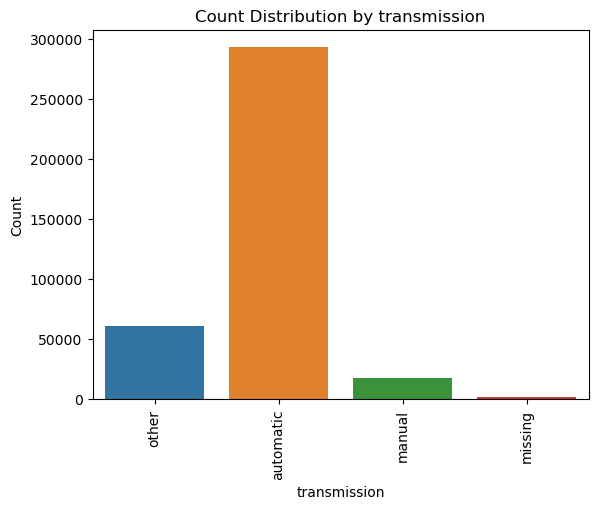

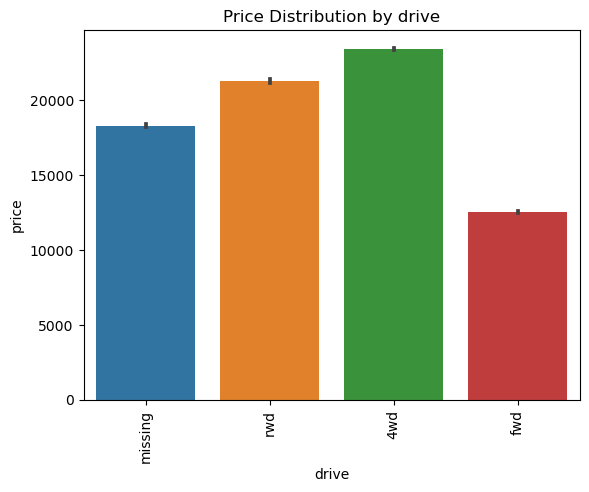

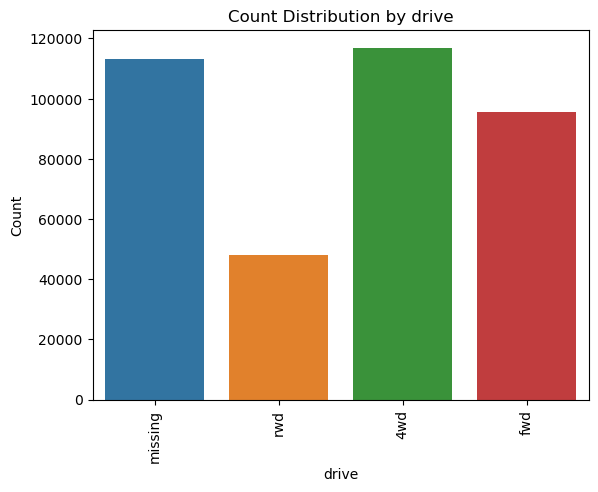

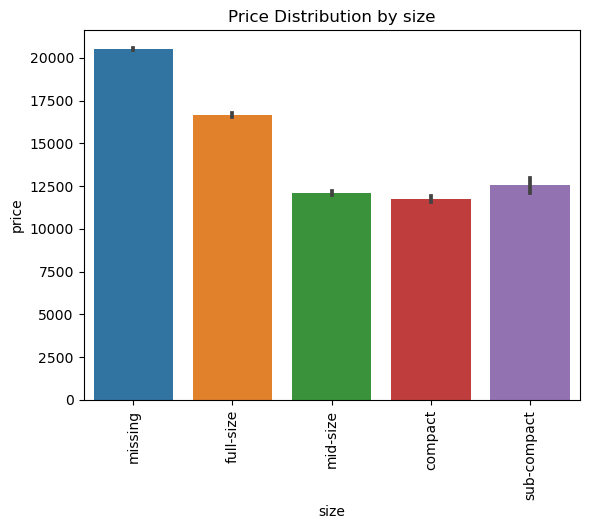

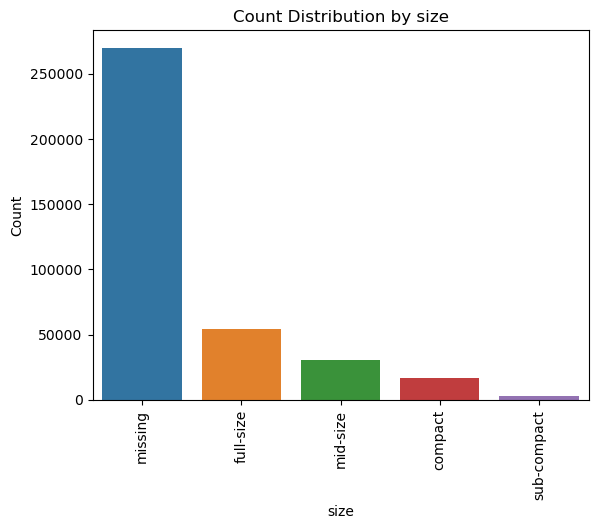

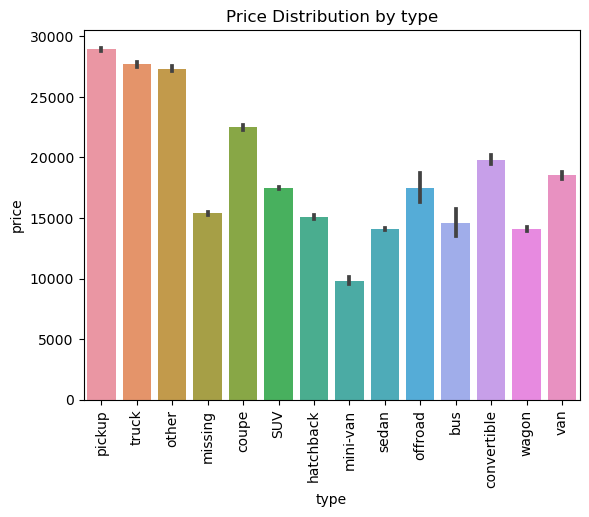

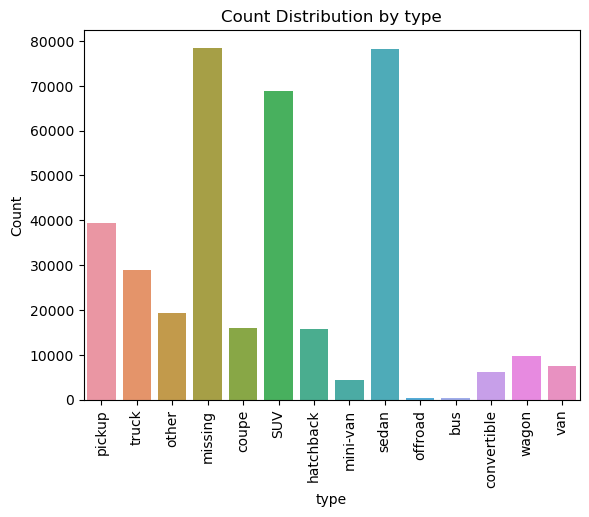

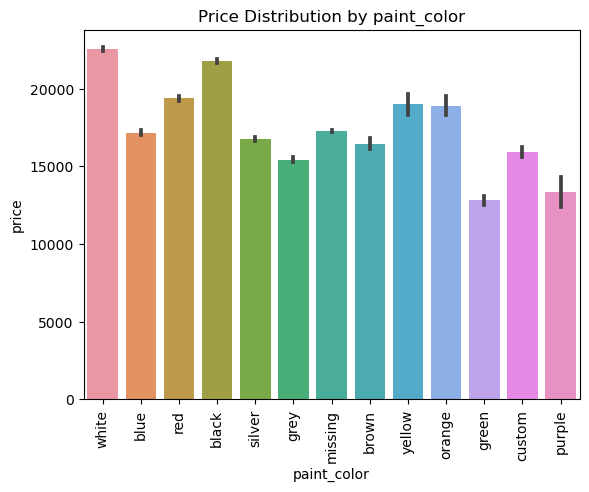

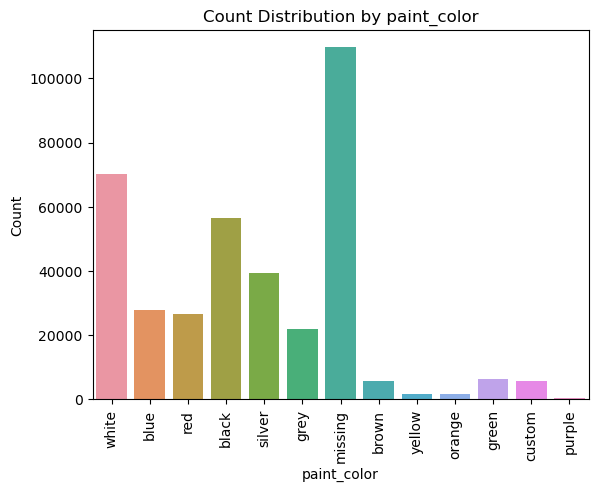

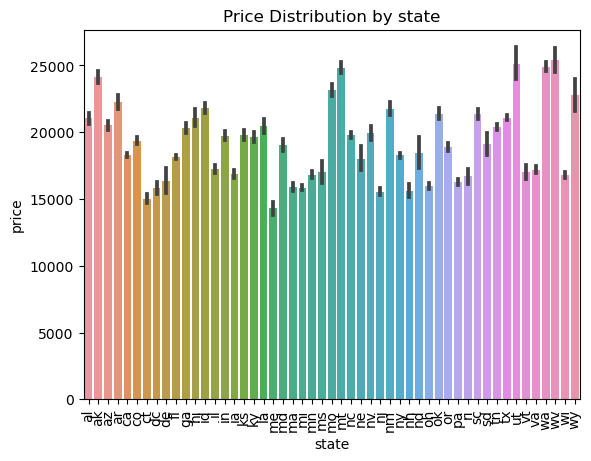

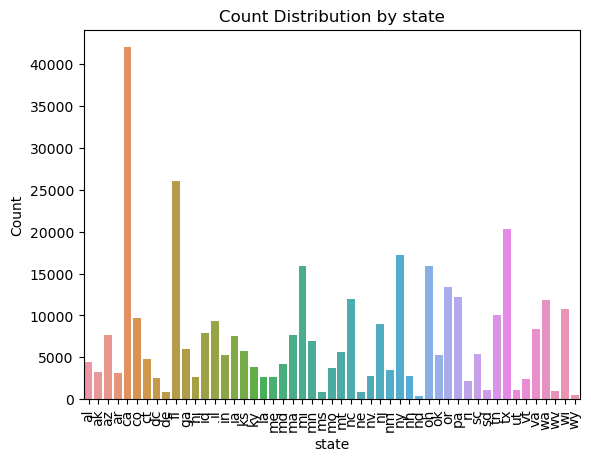

In [17]:
graphlist = ["manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]

for i in graphlist:
    sns.barplot(df, x=i, y="price")
    plt.title(f'Price Distribution by {i}')
    plt.xticks(rotation=90)
    plt.show()
    sns.countplot(data=df, x=i)
    plt.title(f'Count Distribution by {i}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [18]:
df3 = df.drop(["region", "model", "manufacturer", 'state', 'cylinders'], axis = 1)
listOneHotEncode = ['fuel','title_status', 'paint_color','size','type', 'transmission','drive', 'condition']

df6 = pd.get_dummies(df3[listOneHotEncode], dtype=float)
df7 = df3.drop(columns = listOneHotEncode)
df8 = df6.join(df7)
df8.head()

X = df8.drop(columns = ['price'])
y = df8['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Not use standard Scaler due to no influence to Linear Regresssion

In [19]:
pipe = Pipeline([('linearRegression', LinearRegression())
                 ])
pipe.fit(X_train, y_train)

Pipeline(steps=[('linearRegression', LinearRegression())])

In [20]:
linreg_mse_train = mean_squared_error(pipe.predict(X_train),y_train)
linreg_mse_test = mean_squared_error(pipe.predict(X_test),y_test)
print(f"Train MSE is {linreg_mse_train:.3f}.")
print(f"Test MSE is {linreg_mse_test:.3f}.")

Train MSE is 83578396.342.
Test MSE is 83308971.319.


There are two data data analysis models I created. The first one just uses year and odometer, which actually represents better in term of  MSE:263,915 (RMES:149).For tThe second one I reiteratde the modess and decidde which categorical values to add. The conclusion from the tryal I decided to remove "region", "model", "manufacturer", 'state' from the model data sourc.  

In [21]:
coefs = pipe.named_steps['linearRegression'].coef_
intercept = pipe.named_steps['linearRegression'].intercept_
coefs

array([ 1.12013262e+04,  6.02981358e+01, -3.97916027e+03, -2.93922379e+03,
       -2.80548612e+03, -1.53775416e+03,  3.62093496e+03,  4.46690974e+03,
       -3.50803964e+02, -4.40982707e+03, -1.51862788e+03, -1.80858579e+03,
        1.00388876e+03, -2.95077634e+02,  9.21302981e+01, -1.80463459e+02,
        5.85933336e+02, -4.18845584e+02, -1.04695532e+03, -1.62656203e+03,
        8.12864481e+02, -1.08748553e+02, -4.88092659e+02,  7.90017133e+02,
        8.79911236e+02, -7.98447832e+02,  1.92108058e+02, -2.72752645e-01,
        1.60332761e+03, -9.96715086e+02, -1.50436699e+03, -6.19325817e+03,
        3.55012091e+03,  1.84082769e+03, -4.82964353e+03, -8.98486684e+01,
       -1.13844283e+03,  4.25280938e+03,  2.35791355e+03,  4.12973075e+03,
       -3.18776238e+03,  4.49533967e+03,  8.16650525e+02, -4.50006991e+03,
       -8.35316507e+02,  4.19666907e+02,  2.35372747e+02,  1.80276853e+02,
        3.07074552e+03, -4.01530272e+03, -8.25473940e+02,  1.77003114e+03,
       -4.81311825e+02, -

In [22]:
print(intercept)

-1771726.6087427433


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

##### In this type of data the simple liner regression makes sense. We do not want to drop clumns by using LASSO. Ridge requires essentially scaler standardization, which makes the result difficult to understand for dealer peopole. Also linear regresstion without higher order does not makes sense since we have so many factors we need to handle already adding the higher order makes it higher cost in terms of computing.

In [23]:
sign = []
for i in coefs.tolist():
    if i < 0:
        sign.append("-")
    else:
        sign.append("+")
#coefList = zip(X_train.columns.tolist(),abs(coefs).tolist(), sign)
coefList = zip(X_train.columns.tolist(),coefs.tolist(), sign)
coefDf = pd.DataFrame(coefList, columns=['Variable','Coefficient (Abs Value)','Sign']).sort_values(by = "Coefficient (Abs Value)", ascending =False).sort_values(by = "Variable")

In [24]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('year')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
59,year,892.524269,+


In [25]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('odometer')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
60,odometer,-0.068467,-


In [26]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('condition_')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
56,condition_missing,782.154979,+
57,condition_new,736.658149,+
54,condition_good,301.603489,+
55,condition_like new,61.111128,+
52,condition_excellent,-481.311825,-
58,condition_salvage,-575.946630,-
53,condition_fair,-824.269289,-


In [27]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('drive_')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
48,drive_4wd,3070.745520,+
51,drive_rwd,1770.031137,+
50,drive_missing,-825.473940,-
49,drive_fwd,-4015.302718,-


In [28]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('fuel_')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
0,fuel_diesel,11201.326198,+
1,fuel_electric,60.298136,+
5,fuel_other,-1537.754157,-
4,fuel_missing,-2805.486125,-
3,fuel_hybrid,-2939.223787,-
2,fuel_gas,-3979.160266,-


In [29]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('paint_color_')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
12,paint_color_black,1003.888758,+
24,paint_color_yellow,879.911236,+
20,paint_color_purple,812.864481,+
23,paint_color_white,790.017133,+
16,paint_color_green,585.933336,+
14,paint_color_brown,92.130298,+
21,paint_color_red,-108.748553,-
15,paint_color_custom,-180.463459,-
13,paint_color_blue,-295.077634,-
17,paint_color_grey,-418.845584,-


In [30]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('size_')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
28,size_missing,1603.327613,+
26,size_full-size,192.108058,+
27,size_mid-size,-0.272753,-
25,size_compact,-798.447832,-
29,size_sub-compact,-996.715086,-


In [31]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('title_')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
7,title_status_lien,4466.909739,+
6,title_status_clean,3620.934963,+
8,title_status_missing,-350.803964,-
10,title_status_rebuilt,-1518.627881,-
11,title_status_salvage,-1808.585785,-
9,title_status_parts only,-4409.827070,-


In [32]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('transmission_')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
45,transmission_manual,419.666907,+
46,transmission_missing,235.372747,+
47,transmission_other,180.276853,+
44,transmission_automatic,-835.316507,-


In [33]:
coefDf_type = coefDf[coefDf['Variable'].str.contains('type_')]
coefDf_type.sort_values(by = "Coefficient (Abs Value)", ascending =False)

,Variable,Coefficient (Abs Value),Sign
41,type_truck,4495.339669,+
37,type_offroad,4252.809383,+
39,type_pickup,4129.730753,+
32,type_convertible,3550.120911,+
38,type_other,2357.913545,+
33,type_coupe,1840.827691,+
42,type_van,816.650525,+
35,type_mini-van,-89.848668,-
36,type_missing,-1138.442826,-
30,type_SUV,-1504.366987,-


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Based on the data, here are the findings

Year: +$900 value per year

Odometer: -$700 (negative) value every 10K miles

Condition: Based on the data analysis result, it does not seem the result gives us a reasonable price difference between new and others. But this looks effect is in the range of +/-$700 depending on the condition.

Drive     : +$3,000 value for 4WD and -4,000 value for fwd

Fuel      : +$11,000 value for diesel, - 4,000 value for Gas

Color     : +/-$1,000 range price difference depending on the color

Size      : +$200 value for full size followed by smaller size

Title     : +/-$5,000 range influence depending on the item

Transmission: +$400 value for manual, which is a little bit surprising, but maybe this is caused by a potential correlation between a manual and a specialty sports car. In this data analysis, we did not use the "model" or "manufacturer" due to too much complexity, so that could affect this result.

Type      : +/-5000 range difference depending on the type.

In detail, please check the coefficient tables above for more insight. When dealing the car trading, please use this as a reference for the price estimation. Below is the formula from the model to find the quick price estimation using year and odometer only. Based on this quick formula you can just adjust based on the differences of each category value from the list above.

##### Base Price = (892.524269 * year) - (0.068467 * odometer) - (1771726)